In [83]:
import numpy as np
import pandas as pd
import statistics
import pylab
import scipy.stats
from patsy import dmatrices
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
def normalize(x):
    return [(x[n] - min(x)) / (max(x) - 
           min(x)) for n in range(len(x))]




print("Alunos: Gabriel Barbosa Menezes Dantas e Lucas Matheus Carvalho de Assis")
print("Este bloco inicializa as bibliotecas utilizadas na atividade.")

Alunos: Gabriel Barbosa Menezes Dantas e Lucas Matheus Carvalho de Assis
Este bloco inicializa as bibliotecas utilizadas na atividade.


In [58]:
print("Inicializando os valores do documento fornecido:")
V1 = np.array([6.3,5.8,5.1,4.9,4.7,4.6,5,6.4,6.9,5.5,6.5,5.4,4.6,5,6.8,6.7,6.7,6.3,6.5,6.2,5.9,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5,5.2,5,5.9,5.6,5.9,6.1,5,5.2,5.2,4.7,4.8,5.6,6.7,5.6,5.8,6.4,6.8,5.7,5.8,6.2,5.4,5.2,5.5,4.9,6.1,6.4,6.6,6.8,6.7,6,5,5.5,4.9,4.4,5.4,6,6.7,6.3,5.6,5.5,5.5,6.1,5.1,5,4.5,4.4,5,5.1,4.8,6,6.1,5.1,6.7,7.2,6.5,6.4,6.5,7.7,4.6,5.3,5.7,6.3,4.9,7.7,6,6.9,5.6,7.7,6.3,6.7,6.6,6.3,5.7,5.5,5.5,5.8,6,5.8,5,7.1,6.3,6.5,7.6,5.6,5.7,5.7,7.3,6.2,5.1,5.7,4.9,7.2,6.2,6.1,6.4,7.2,6,6.9,6.7,6.9,5.8,5,7])
V2 = np.array([3.3,2.7,3.5,3,3.2,3.1,3.6,3.2,3.1,2.3,2.8,3.9,3.4,3.4,3.2,3.3,3,2.5,3,3.4,3,2.9,3.1,3.7,3.4,3,3,4,4.4,3.9,3.5,2.8,3.8,2.8,2.8,2.6,3,3.4,3.1,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3,2.7,2,3,2.5,3.2,2.8,3.4,3.5,3.4,3.2,3.1,2.9,3.1,3,2.7,2.7,3,2.5,2.8,2.2,3.4,4.1,4.2,3.1,2.8,2.9,3,2.8,3,2.9,3.2,3.5,3.6,3,3,3.4,3.1,2.3,3,2.5,2.6,3,3.4,3.5,2.3,3.2,3.5,3.8,3,2.2,2.9,3.8,2.5,3.6,3.2,3.2,3,3.8,3.2,3.7,2.8,3.3,2.4,2.6,2.2,3.2,2.8,2.8,2.7,3.3,2.9,2.5,2.6,2.4,2.4,2.7,2.7,2.6,2.3,3,2.9,3,3,2.7,3,2.9,2.9,2.9,2.5,2.8,2.5,3.2,2.8,3,2.8,3,3,3.1,3.1,3.1,2.7,3.3,3.2])
V3 = np.array([7.65,7.55,4.95,5.3,4.6,4.55,4.6,8,9.15,7.55,8.8,4.95,4.1,4.9,8.8,8.45,8.9,8.85,8.5,7.3,7.3,4.45,5.15,5.25,4.5,5.1,4.1,5.6,4.8,4.95,4.95,10.6,10.1,8.6,8.4,8.3,10.9,7.5,8.15,5.7,4.5,5.7,4.65,3.8,5.25,4.5,5.5,6.35,7,7.3,7.45,7,8,4.9,5.15,5.3,4.6,4.95,6.85,8.75,6.7,7.55,8.75,9.1,7.65,7.4,9.1,5.7,4.25,4.7,5.15,8,8.45,8.7,9.4,8.9,7.65,5.2,5.75,4.4,4.3,6.3,6.9,8.75,9.15,6.7,7.25,7.1,7.7,5.1,4.75,5.55,4,4.75,4.5,5.1,8.7,7.85,4.5,9.65,9,8.2,8,8.5,9.7,4.4,5.05,7.2,7.65,6.2,11.5,8.7,9,7,11.2,8.55,8.45,8.85,8.85,7.5,7.4,7.4,7.55,7.95,7.7,6.55,9.7,8.25,8.5,10.7,7.15,6.9,7.05,10.25,8.05,6.45,7.2,6.05,9.6,8.2,7.7,8.6,9.9,7.5,9.15,8.75,9.15,7.55,5.05,9.2])
V4 = np.array([6,5.1,1.4,1.4,1.3,1.5,1.4,4.5,4.9,4,4.6,1.7,1.4,1.5,5.9,5.7,5.2,5,5.2,5.4,5.1,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,1.7,1.5,1.7,1.5,1,1.7,1.9,1.6,3.9,3.5,4.2,3.9,4.8,4,1.6,1.5,1.4,1.6,1.6,3.6,4.4,4.5,4.1,5.3,5.5,5,5.1,4.5,1.5,1.5,1.4,1.5,4.7,4.3,4.4,4.8,5,4.5,1.2,1.3,1.4,1.3,4.5,4.5,4.7,4.4,4.1,4,4.4,4.6,1.5,1.3,1.3,1.3,1.6,1.9,1.4,4,4.7,1.6,5.8,6.1,5.1,5.3,5.5,6.7,1.4,1.5,4.5,4.7,3.3,6.9,5,5.7,4.9,6.7,4.9,5.7,4.6,4.9,3.5,3.8,3.7,3.9,5.1,4,3.3,5.9,5.6,5.8,6.6,4.2,4.2,4.2,6.3,4.3,3,4.1,4.5,6,4.8,4.9,5.6,5.8,4.8,5.4,5.6,5.1,5.1,1.4,4.7])
V5 = np.array([36,26.01,1.96,1.96,1.69,2.25,1.96,20.25,24.01,16,21.16,2.89,1.96,2.25,34.81,32.49,27.04,25,27.04,29.16,26.01,1.96,2.25,2.25,2.56,1.96,1.21,1.44,2.25,1.69,1.96,37.21,40.96,31.36,26.01,31.36,37.21,31.36,30.25,2.89,2.25,2.89,2.25,1,2.89,3.61,2.56,15.21,12.25,17.64,15.21,23.04,16,2.56,2.25,1.96,2.56,2.56,12.96,19.36,20.25,16.81,28.09,30.25,25,26.01,20.25,2.25,2.25,1.96,2.25,22.09,18.49,19.36,23.04,25,20.25,1.44,1.69,1.96,1.69,20.25,20.25,22.09,19.36,16.81,16,19.36,21.16,2.25,1.69,1.69,1.69,2.56,3.61,1.96,16,22.09,2.56,33.64,37.21,26.01,28.09,30.25,44.89,1.96,2.25,20.25,22.09,10.89,47.61,25,32.49,24.01,44.89,24.01,32.49,21.16,24.01,12.25,14.44,13.69,15.21,26.01,16,10.89,34.81,31.36,33.64,43.56,17.64,17.64,17.64,39.69,18.49,9,16.81,20.25,36,23.04,24.01,31.36,33.64,23.04,29.16,31.36,26.01,26.01,1.96,22.09])
V6 = np.array([2.5,1.9,0.2,0.2,0.2,0.2,0.2,1.5,1.5,1.3,1.5,0.4,0.3,0.2,2.3,2.5,2.3,1.9,2,2.3,1.8,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,1.9,2,2.2,1.5,1.4,2.3,2.4,1.8,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,1.4,1,1.5,1.1,1.8,1.3,0.4,0.2,0.2,0.2,0.2,1.3,1.4,1.5,1,1.9,2.1,2,2.4,1.5,0.4,0.1,0.2,0.2,1.2,1.3,1.4,1.4,1.7,1.5,0.2,0.2,0.1,0.2,1.5,1.6,1.5,1.3,1.3,1.3,1.2,1.4,0.2,0.3,0.3,0.2,0.6,0.4,0.3,1,1.4,0.2,1.8,2.5,2,2.3,1.8,2.2,0.2,0.2,1.3,1.6,1,2.3,1.5,2.3,2,2,1.8,2.1,1.3,1.5,1,1.1,1,1.2,1.6,1.2,1,2.1,1.8,2.2,2.1,1.3,1.2,1.3,1.8,1.3,1.1,1.3,1.7,1.8,1.8,1.8,2.1,1.6,1.8,2.1,2.4,2.3,1.9,0.2,1.4])
classes = np.array([3,3,1,1,1,1,1,2,2,2,2,1,1,1,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,2,2,2,2,3,3,3,3,2,1,1,1,1,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,1,3,3,3,3,3,3,1,1,2,2,2,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,3,3,3,3,2,2,2,3,2,2,2,3,3,3,3,3,3,3,3,3,3,3,1,2])

Inicializando os valores do documento fornecido:


https://colab.research.google.com/drive/1Y4fjPMOfh3WWqLzw5cv4kikrp77iYKYl#scrollTo=qdkftIWUFDqu

link para a questão 2 kkk ainda apanhando


In [4]:
print("Questão 1, item a): Verificando a existência de colinearidade")
print('Os valores infinitos da multicolinearidade de V1, V2 e V3 implicam uma correlação perfeita.')

df = pd.DataFrame(
    {'V1' : [6.3,5.8,5.1,4.9,4.7,4.6,5,6.4,6.9,5.5,6.5,5.4,4.6,5,6.8,6.7,6.7,6.3,6.5,6.2,5.9,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5,5.2,5,5.9,5.6,5.9,6.1,5,5.2,5.2,4.7,4.8,5.6,6.7,5.6,5.8,6.4,6.8,5.7,5.8,6.2,5.4,5.2,5.5,4.9,6.1,6.4,6.6,6.8,6.7,6,5,5.5,4.9,4.4,5.4,6,6.7,6.3,5.6,5.5,5.5,6.1,5.1,5,4.5,4.4,5,5.1,4.8,6,6.1,5.1,6.7,7.2,6.5,6.4,6.5,7.7,4.6,5.3,5.7,6.3,4.9,7.7,6,6.9,5.6,7.7,6.3,6.7,6.6,6.3,5.7,5.5,5.5,5.8,6,5.8,5,7.1,6.3,6.5,7.6,5.6,5.7,5.7,7.3,6.2,5.1,5.7,4.9,7.2,6.2,6.1,6.4,7.2,6,6.9,6.7,6.9,5.8,5,7],
'V2' : [3.3,2.7,3.5,3,3.2,3.1,3.6,3.2,3.1,2.3,2.8,3.9,3.4,3.4,3.2,3.3,3,2.5,3,3.4,3,2.9,3.1,3.7,3.4,3,3,4,4.4,3.9,3.5,2.8,3.8,2.8,2.8,2.6,3,3.4,3.1,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3,2.7,2,3,2.5,3.2,2.8,3.4,3.5,3.4,3.2,3.1,2.9,3.1,3,2.7,2.7,3,2.5,2.8,2.2,3.4,4.1,4.2,3.1,2.8,2.9,3,2.8,3,2.9,3.2,3.5,3.6,3,3,3.4,3.1,2.3,3,2.5,2.6,3,3.4,3.5,2.3,3.2,3.5,3.8,3,2.2,2.9,3.8,2.5,3.6,3.2,3.2,3,3.8,3.2,3.7,2.8,3.3,2.4,2.6,2.2,3.2,2.8,2.8,2.7,3.3,2.9,2.5,2.6,2.4,2.4,2.7,2.7,2.6,2.3,3,2.9,3,3,2.7,3,2.9,2.9,2.9,2.5,2.8,2.5,3.2,2.8,3,2.8,3,3,3.1,3.1,3.1,2.7,3.3,3.2],
'V3' : [7.65,7.55,4.95,5.3,4.6,4.55,4.6,8,9.15,7.55,8.8,4.95,4.1,4.9,8.8,8.45,8.9,8.85,8.5,7.3,7.3,4.45,5.15,5.25,4.5,5.1,4.1,5.6,4.8,4.95,4.95,10.6,10.1,8.6,8.4,8.3,10.9,7.5,8.15,5.7,4.5,5.7,4.65,3.8,5.25,4.5,5.5,6.35,7,7.3,7.45,7,8,4.9,5.15,5.3,4.6,4.95,6.85,8.75,6.7,7.55,8.75,9.1,7.65,7.4,9.1,5.7,4.25,4.7,5.15,8,8.45,8.7,9.4,8.9,7.65,5.2,5.75,4.4,4.3,6.3,6.9,8.75,9.15,6.7,7.25,7.1,7.7,5.1,4.75,5.55,4,4.75,4.5,5.1,8.7,7.85,4.5,9.65,9,8.2,8,8.5,9.7,4.4,5.05,7.2,7.65,6.2,11.5,8.7,9,7,11.2,8.55,8.45,8.85,8.85,7.5,7.4,7.4,7.55,7.95,7.7,6.55,9.7,8.25,8.5,10.7,7.15,6.9,7.05,10.25,8.05,6.45,7.2,6.05,9.6,8.2,7.7,8.6,9.9,7.5,9.15,8.75,9.15,7.55,5.05,9.2],
'V4' : [6,5.1,1.4,1.4,1.3,1.5,1.4,4.5,4.9,4,4.6,1.7,1.4,1.5,5.9,5.7,5.2,5,5.2,5.4,5.1,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,1.7,1.5,1.7,1.5,1,1.7,1.9,1.6,3.9,3.5,4.2,3.9,4.8,4,1.6,1.5,1.4,1.6,1.6,3.6,4.4,4.5,4.1,5.3,5.5,5,5.1,4.5,1.5,1.5,1.4,1.5,4.7,4.3,4.4,4.8,5,4.5,1.2,1.3,1.4,1.3,4.5,4.5,4.7,4.4,4.1,4,4.4,4.6,1.5,1.3,1.3,1.3,1.6,1.9,1.4,4,4.7,1.6,5.8,6.1,5.1,5.3,5.5,6.7,1.4,1.5,4.5,4.7,3.3,6.9,5,5.7,4.9,6.7,4.9,5.7,4.6,4.9,3.5,3.8,3.7,3.9,5.1,4,3.3,5.9,5.6,5.8,6.6,4.2,4.2,4.2,6.3,4.3,3,4.1,4.5,6,4.8,4.9,5.6,5.8,4.8,5.4,5.6,5.1,5.1,1.4,4.7],
'V5' : [36,26.01,1.96,1.96,1.69,2.25,1.96,20.25,24.01,16,21.16,2.89,1.96,2.25,34.81,32.49,27.04,25,27.04,29.16,26.01,1.96,2.25,2.25,2.56,1.96,1.21,1.44,2.25,1.69,1.96,37.21,40.96,31.36,26.01,31.36,37.21,31.36,30.25,2.89,2.25,2.89,2.25,1,2.89,3.61,2.56,15.21,12.25,17.64,15.21,23.04,16,2.56,2.25,1.96,2.56,2.56,12.96,19.36,20.25,16.81,28.09,30.25,25,26.01,20.25,2.25,2.25,1.96,2.25,22.09,18.49,19.36,23.04,25,20.25,1.44,1.69,1.96,1.69,20.25,20.25,22.09,19.36,16.81,16,19.36,21.16,2.25,1.69,1.69,1.69,2.56,3.61,1.96,16,22.09,2.56,33.64,37.21,26.01,28.09,30.25,44.89,1.96,2.25,20.25,22.09,10.89,47.61,25,32.49,24.01,44.89,24.01,32.49,21.16,24.01,12.25,14.44,13.69,15.21,26.01,16,10.89,34.81,31.36,33.64,43.56,17.64,17.64,17.64,39.69,18.49,9,16.81,20.25,36,23.04,24.01,31.36,33.64,23.04,29.16,31.36,26.01,26.01,1.96,22.09],
'V6' : [2.5,1.9,0.2,0.2,0.2,0.2,0.2,1.5,1.5,1.3,1.5,0.4,0.3,0.2,2.3,2.5,2.3,1.9,2,2.3,1.8,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,1.9,2,2.2,1.5,1.4,2.3,2.4,1.8,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,1.4,1,1.5,1.1,1.8,1.3,0.4,0.2,0.2,0.2,0.2,1.3,1.4,1.5,1,1.9,2.1,2,2.4,1.5,0.4,0.1,0.2,0.2,1.2,1.3,1.4,1.4,1.7,1.5,0.2,0.2,0.1,0.2,1.5,1.6,1.5,1.3,1.3,1.3,1.2,1.4,0.2,0.3,0.3,0.2,0.6,0.4,0.3,1,1.4,0.2,1.8,2.5,2,2.3,1.8,2.2,0.2,0.2,1.3,1.6,1,2.3,1.5,2.3,2,2,1.8,2.1,1.3,1.5,1,1.1,1,1.2,1.6,1.2,1,2.1,1.8,2.2,2.1,1.3,1.2,1.3,1.8,1.3,1.1,1.3,1.7,1.8,1.8,1.8,2.1,1.6,1.8,2.1,2.4,2.3,1.9,0.2,1.4],
}
)

X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Questão 1, item a): Verificando a existência de colinearidade
Os valores infinitos da multicolinearidade de V1, V2 e V3 implicam uma correlação perfeita.


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const    269.922482
V1              inf
V2              inf
V3              inf
V4        73.719682
V5        43.912484
V6        16.166227
dtype: float64

Questão 1, item a): Verificando a distribuição e escala de V1
Desvio Padrão de V1, a escala:  0.8253012917851409
Histograma de V1, a distribuição:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbef32cd390>]],
      dtype=object)

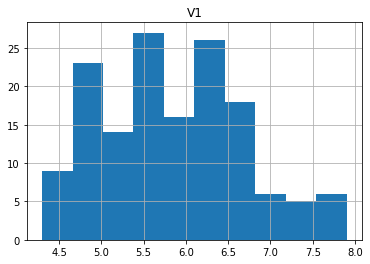

In [5]:
print("Questão 1, item a): Verificando a distribuição e escala de V1")
print("Desvio Padrão de V1, a escala: ",np.std(V1))
print("Histograma de V1, a distribuição:")
histV1 = pd.DataFrame({'V1':V1})
histV1.hist()

Questão 1, item a): Verificando a distribuição e escala de V2
Desvio Padrão de V2, a escala:  0.4344109677354946
Histograma de V2, a distribuição:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbef2a3d518>]],
      dtype=object)

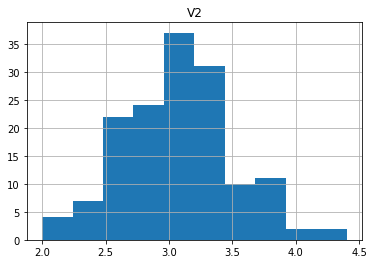

In [6]:
print("Questão 1, item a): Verificando a distribuição e escala de V2")
print("Desvio Padrão de V2, a escala: ",np.std(V2))
print("Histograma de V2, a distribuição:")
histV2 = pd.DataFrame({'V2':V2})
histV2.hist()

Questão 1, item a): Verificando a distribuição e escala de V3
Desvio Padrão de V3, a escala:  1.8444510173912332
Histograma de V3, a distribuição:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbef2503588>]],
      dtype=object)

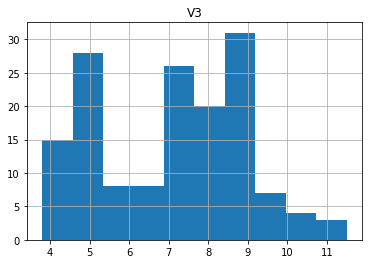

In [7]:
print("Questão 1, item a): Verificando a distribuição e escala de V3")
print("Desvio Padrão de V3, a escala: ",np.std(V3))
print("Histograma de V3, a distribuição:")
histV3 = pd.DataFrame({'V3':V3})
histV3.hist()

Questão 1, item a): Verificando a distribuição e escala de V4
Desvio Padrão de V4, a escala:  1.759404065775303
Histograma de V4, a distribuição:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbef2533630>]],
      dtype=object)

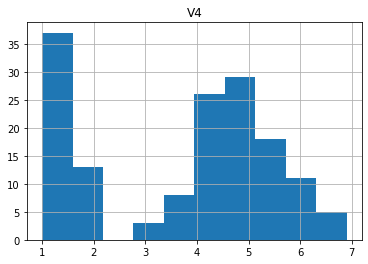

In [8]:
print("Questão 1, item a): Verificando a distribuição e escala de V4")
print("Desvio Padrão de V4, a escala: ",np.std(V4))
print("Histograma de V4, a distribuição:")
histV4 = pd.DataFrame({'V4':V4})
histV4.hist()

Questão 1, item a): Verificando a distribuição e escala de V5
Desvio Padrão de V5, a escala:  12.584883031990758
Histograma de V5, a distribuição:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbef240a6a0>]],
      dtype=object)

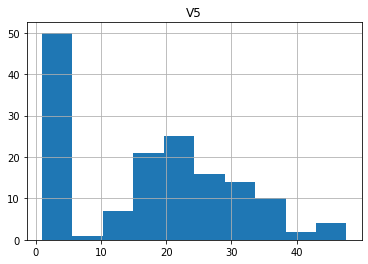

In [9]:
print("Questão 1, item a): Verificando a distribuição e escala de V5")
print("Desvio Padrão de V5, a escala: ",np.std(V5))
print("Histograma de V5, a distribuição:")
histV5 = pd.DataFrame({'V5':V5})
histV5.hist()

Questão 1, item a): Verificando a distribuição e escala de V6
Desvio Padrão de V6, a escala:  0.7596926279021594
Histograma de V6, a distribuição:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbef24133c8>]],
      dtype=object)

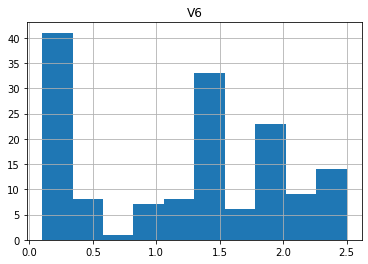

In [10]:
print("Questão 1, item a): Verificando a distribuição e escala de V6")
print("Desvio Padrão de V6, a escala: ",np.std(V6))
print("Histograma de V6, a distribuição:")
histV6 = pd.DataFrame({'V6':V6})
histV6.hist()

Questão 1, item a): Calculando a correlação entre as variáveis
Matriz de Correlação entre as variáveis: 


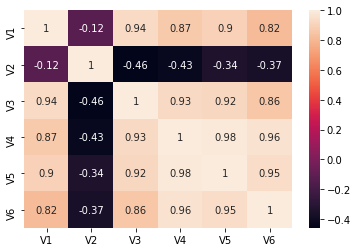

In [11]:
print('Questão 1, item a): Calculando a correlação entre as variáveis')
data = {'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6
        }

df = pd.DataFrame(data,columns=['V1','V2','V3','V4','V5','V6'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
print("Matriz de Correlação entre as variáveis: ")
plt.show()

In [12]:
print('Questão 1, item b): Correlacionando as variáveis com o "target".')
data = {'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6,
        'target':classes
        }

df = pd.DataFrame(data,columns=['V1','V2','V3','V4','V5','V6','target'])
df.corrwith(df['target'])

Questão 1, item b): Correlacionando as variáveis com o "target".


V1        0.782561
V2       -0.426658
V3        0.851047
V4        0.949035
V5        0.939327
V6        0.956547
target    1.000000
dtype: float64

In [15]:
print('Questão 1, item c): Verificando a normalidade das variáveis.')
print("Normalidade de V1, quanto maior que zero, menos próxima da distribuição normal: ",sm.stats.stattools.jarque_bera(V1)[0])
print("Normalidade de V2, quanto maior que zero, menos próxima da distribuição normal: ",sm.stats.stattools.jarque_bera(V2)[0])
print("Normalidade de V3, quanto maior que zero, menos próxima da distribuição normal: ",sm.stats.stattools.jarque_bera(V3)[0])
print("Normalidade de V4, quanto maior que zero, menos próxima da distribuição normal: ",sm.stats.stattools.jarque_bera(V4)[0])
print("Normalidade de V5, quanto maior que zero, menos próxima da distribuição normal: ",sm.stats.stattools.jarque_bera(V5)[0])
print("Normalidade de V6, quanto maior que zero, menos próxima da distribuição normal: ",sm.stats.stattools.jarque_bera(V6)[0])

Questão 1, item c): Verificando a normalidade das variáveis.
Normalidade de V1, quanto maior que zero, menos próxima da distribuição normal:  4.48587543735093
Normalidade de V2, quanto maior que zero, menos próxima da distribuição normal:  2.697424308041611
Normalidade de V3, quanto maior que zero, menos próxima da distribuição normal:  5.938320638992927
Normalidade de V4, quanto maior que zero, menos próxima da distribuição normal:  14.023339235201124
Normalidade de V5, quanto maior que zero, menos próxima da distribuição normal:  7.2875275227906045
Normalidade de V6, quanto maior que zero, menos próxima da distribuição normal:  11.416490257467567


Questão 1, item d): Procurando outliers em V1


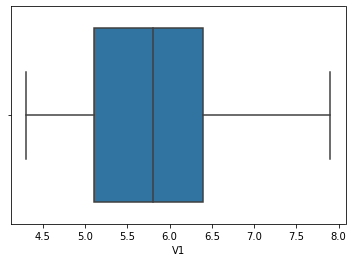

In [23]:
print('Questão 1, item d): Procurando outliers em V1')
data = {'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6
        }

df = pd.DataFrame(data,columns=['V1','V2','V3','V4','V5','V6'])
sn.boxplot(data=df,x=df['V1'])

Questão 1, item d): Procurando outliers em V2


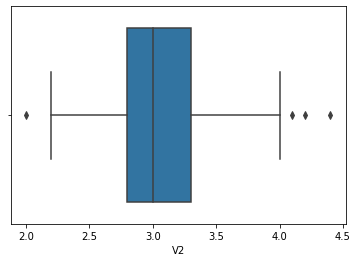

In [24]:
print('Questão 1, item d): Procurando outliers em V2')
data = {'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6
        }

df = pd.DataFrame(data,columns=['V1','V2','V3','V4','V5','V6'])
sn.boxplot(data=df,x=df['V2'])

In [28]:
print('Podemos ver acima, no boxplot de V2, que há quatro outliers.')

Podemos ver acima, no boxplot de V2, que há quatro outliers.


Questão 1, item d): Procurando outliers em V3


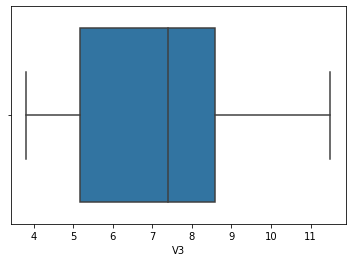

In [25]:
print('Questão 1, item d): Procurando outliers em V3')
data = {'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6
        }

df = pd.DataFrame(data,columns=['V1','V2','V3','V4','V5','V6'])
sn.boxplot(data=df,x=df['V3'])

Questão 1, item d): Procurando outliers em V4


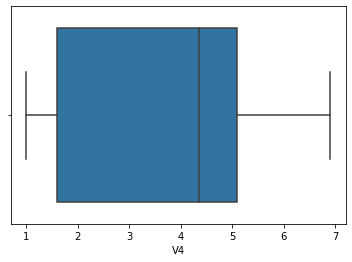

In [26]:
print('Questão 1, item d): Procurando outliers em V4')
data = {'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6
        }

df = pd.DataFrame(data,columns=['V1','V2','V3','V4','V5','V6'])
sn.boxplot(data=df,x=df['V4'])

Questão 1, item d): Procurando outliers em V5


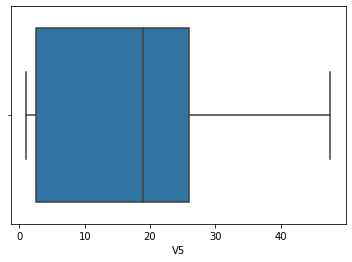

In [27]:
print('Questão 1, item d): Procurando outliers em V5')
data = {'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6
        }

df = pd.DataFrame(data,columns=['V1','V2','V3','V4','V5','V6'])
sn.boxplot(data=df,x=df['V5'])

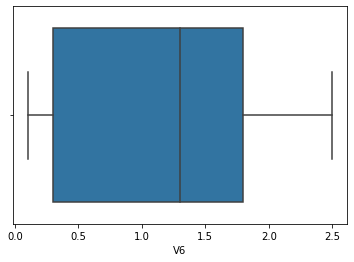

In [22]:
print('Questão 1, item d): Procurando outliers em V6')
data = {'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6
        }

df = pd.DataFrame(data,columns=['V1','V2','V3','V4','V5','V6'])
sn.boxplot(data=df,x=df['V6'])

In [29]:
print('V2 foi o único conjunto de dados a ter outliers.')

V2 foi o único conjunto de dados a ter outliers.


In [59]:
print('Questão 2, item a): Normalizando o conjunto de dados.')
V1N = normalize(V1)
V2N = normalize(V2)
V3N = normalize(V3)
V4N = normalize(V4)
V5N = normalize(V5)
V6N = normalize(V6)

Questão 2, item a): Normalizando o conjunto de dados.


In [60]:
print('Questão 2, item b): Autovalores e Autovetores do conjunto.')
M = ([V1N,V3N,V3N,V4N,V5N,V6N])
#matriz de covariâncias
dCovariancia = np.cov(M)
[dAutovalor, dAutovetor] = np.linalg.eig(dCovariancia)
print("Matriz de Autovalores",dAutovalor)
print("Matriz de Autovetores",dAutovetor)

Questão 2, item b): Autovalores e Autovetores do conjunto.
Matriz de Autovalores [4.03790178e-01 1.93789034e-02 4.90363929e-03 3.43940468e-03
 7.07495285e-04 5.53794650e-19]
Matriz de Autovetores [[-3.35530762e-01  4.81599708e-01 -7.66491140e-01  9.69183573e-02
   2.42030974e-01  1.85285403e-15]
 [-3.64956947e-01  4.01039958e-01  3.86985120e-01  1.82427177e-01
  -1.51447089e-01 -7.07106781e-01]
 [-3.64956947e-01  4.01039958e-01  3.86985120e-01  1.82427177e-01
  -1.51447089e-01  7.07106781e-01]
 [-4.65275178e-01 -2.25989179e-01  2.50462372e-01 -3.51979860e-01
   7.38800838e-01  1.04202299e-14]
 [-4.19705365e-01 -1.31934038e-01 -1.64420232e-01 -6.74096726e-01
  -5.70088069e-01 -7.82513253e-15]
 [-4.77910427e-01 -6.14750295e-01 -1.52351416e-01  5.88006177e-01
  -1.57230662e-01 -1.86969899e-15]]


In [79]:
print('Questão 2, item c): Descorrelacionando o conjunto de dados.')
#descorrelacionando a matriz de covariância
dDescorrelacionando = np.matmul(dAutovetor, M)
novoM = np.matmul(dCovariancia, dDescorrelacionando)

Questão 2, item c): Descorrelacionando o conjunto de dados.


Questão 2, item d) averiguando o grau de informação de cada variável


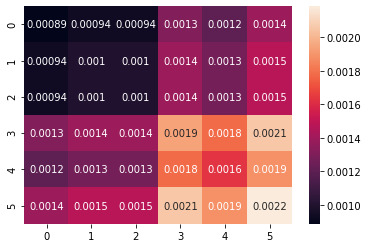

In [87]:
print("Questão 2, item d) averiguando o grau de informação de cada variável")
sn.heatmap(np.cov(novoM), annot=True)
plt.show()
print('Como podemos ver no gráfico e no valor do VIF de V4, V5 e V6, as três possuem')
print('alto índice de correlação. Dimensões com maior correlação podem jogar para baixo')
print('o desempenho do modelo. Além disso, não é bom ter múltiplas variáveis ​​de informações ou variação similares.')
print('Podemos então remover as três variáveis de nosso problema.')

Questão 2, item e): Transformando o conjunto original ao remover as três variáveis mais correlacionadas.


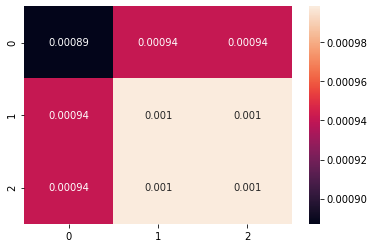

In [91]:
print('Questão 2, item e): Transformando o conjunto original ao remover as três variáveis mais correlacionadas.')
M_reduzido = [novoM[0],novoM[1], novoM[2]]
sn.heatmap(np.cov(M_reduzido), annot=True)
plt.show()

Questão 2, item f)


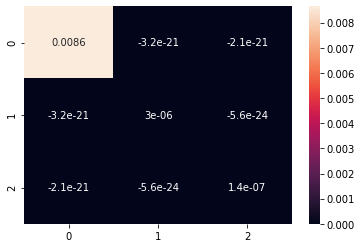

In [98]:
print('Questão 2, item f): Reduzindo o dataset com PCA')
pca = PCA(n_components=3)
novoIM = novoM.transpose()
Mpca = pca.fit_transform(novoIM)
Mpca = Mpca.transpose()
sn.heatmap(np.cov(Mpca), annot=True)
plt.show()
print('A diferença entre os gráficos de covariância deve-se ao método de redução:')
print('a retirada direta de variáveis é muito menos precisa que a avaliação do')
print('algoritmo sobre o conjunto de dados fornecido.')

Questão 3, item a)
Matriz de Covariância entre as variáveis: 


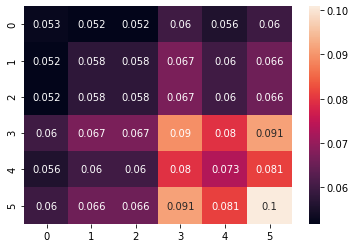

In [42]:
print('Questão 3, item a)')
#esta função calcula a variável normalizada através da fómula de max/min
V1N = normalize(V1)
V2N = normalize(V2)
V3N = normalize(V3)
V4N = normalize(V4)
V5N = normalize(V5)
V6N = normalize(V6)

M = ([V1N,V3N,V3N,V4N,V5N,V6N])
print("Matriz de Covariância entre as variáveis: ")
sn.heatmap(np.cov(M), annot=True)
plt.show()
print('Como V1 e V2 possuem a menor correlação entre as variáveis, podemos afirmar')
print('que são mais informativas. Logo serão as escolhidas.')

Questão 3, item b): verificando a posição das 3 classes.


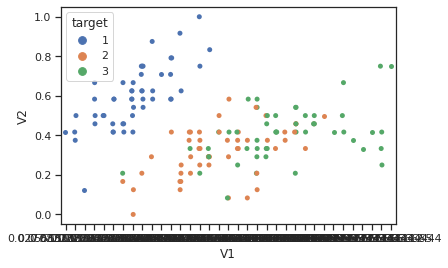

In [104]:
print('Questão 3, item b): verificando a posição das 3 classes.')

sn.set_theme(style="ticks", color_codes=True)
data = {'V1': V1N,
        'V2': V2N,
        'target' : classes
        }

df = pd.DataFrame(data,columns=['V1','V2','target'])
sn.stripplot(x="V1", y="V2", hue="target", data=df)

Questão 3, item c): verificando a posição das 3 classes no conjunto descorrelacionado.


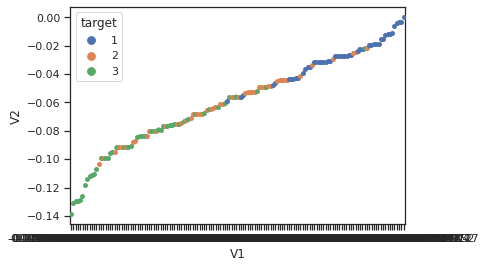

In [106]:
print('Questão 3, item c): verificando a posição das 3 classes no conjunto descorrelacionado.')
sn.set_theme(style="ticks", color_codes=True)
data = {'V1': novoM[0],
        'V2': novoM[1],
        'target' : classes
        }

df = pd.DataFrame(data,columns=['V1','V2','target'])
sn.stripplot(x="V1", y="V2", hue="target", data=df) #a execução dessa linha de código demora muito!!!!

In [107]:
print('Questão 3, item d): vendo a distribuição muito mais próxima à distribuição')
print('normal, é fácil afirmar que o modelo computacional descorrelacionado terá')
print('muito maiores chances de sucesso, graças à clareza da informação que provide.')
print('Em comparação, o conjunto de dados não processado parece apenas um conjunto')
print('de valores aleatórios.')

Questão 3, item d): vendo a distribuição muito mais próxima à distribuição
normal, é fácil afirmar que o modelo computacional descorrelacionado terá
muito maiores chances de sucesso, graças à clareza da informação que provide.
Em comparação, o conjunto de dados não processado parece apenas um conjunto
de valores aleatórios.
